# Problem set 4: Analyzing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import pandas as pd
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [2]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [3]:
nah1_api = DstApi('NAH1') 
params = nah1_api._define_base_params(language='en')

nah1 = nah1_api.get_data(params = params)


**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [4]:
nah1.rename(columns = columns_dict, inplace=True)

for key,value in var_dict.items():
    nah1.variable.replace(key, value, inplace = True)

for key,value in unit_dict.items():
    nah1.unit.replace(key, value, inplace = True)

In [5]:
nah1.head(10)

,variable,unit,year,value
0,D.21 Taxes on products,real,1990,172737
1,D.21 Taxes on products,nominal,1990,127811
2,D.21-D.31 Taxes less subsidies on products,real,1990,165403
3,D.21-D.31 Taxes less subsidies on products,nominal,1990,112836
4,D.31 Subsidies on products,real,1990,8430
5,D.31 Subsidies on products,nominal,1990,14975
6,Y,real,1990,2032441
7,Y,nominal,1990,1400009
8,P.11+P.12+P.131 Market output and output for o...,real,1990,..
9,P.11+P.12+P.131 Market output and output for o...,nominal,1990,..


**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [6]:
# write you code here
nah1 = nah1[nah1["variable"].isin(["Y", "C", "G", "I", "X", "M"])]
nah1.value = nah1.value.astype('float')

**Step 4:** Discuss what the following summary statistics show.

In [7]:
nah1.groupby(['variable','unit']).describe()

# Gennemsnit og middelværdi af year og value grupperet på de forskellige variable og unit.

year                                                       \
                 count    mean        std     min      25%     50%      75%   
variable unit                                                                 
C        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
G        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
I        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
M        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
X        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
Y        nominal  58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   
         real     58.0  1994.5  16.886879  1966.0  1980.25  1994.5  2008.75   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2023.0  58.0  8.245040e+05  5.470365e+05    62576.0   
         real     2023.0  58.0  1.076335e+06  2.899323e+05   549491.0   
G        nominal  2023.0  58.0  2.792485e+05  1.923473e+05    14768.0   
         real     2023.0  58.0  3.763944e+05  1.050996e+05   171307.0   
I        nominal  2023.0  58.0  2.443793e+05  1.745084e+05    21134.0   
         real     2023.0  58.0  2.867239e+05  1.180796e+05   127630.0   
M        nominal  2023.0  58.0  4.892097e+05  4.315943e+05    24406.0   
         real     2023.0  58.0  5.193109e+05  3.540163e+05   112171.0   
X        nominal  2023.0  58.0  5.528596e+05  4.986340e+05    23110.0   
         real     2023.0  58.0  6.026687e+05  3.985825e+05   123594.0   
Y        nominal  2023.0  58.0  1.947509e+06  1.408479e+06   144582.0   
         real     2023.0  58.0  2.398232e+06  8.734029e+05  1089347.0   

                                                                
                         25%        50%         75%        max  
variable unit                                                   
C        nominal   331396.75   760812.5  1313458.75  1909003.0  
         real      848126.75  1049562.0  1353608.75  1569998.0  
G        nominal   109026.50   245849.5   473857.00   629928.0  
         real      312263.75   359337.5   484169.25   538248.0  
I        nominal    81899.50   200249.0   364978.50   676212.0  
         real      183260.00   251935.0   363662.25   567588.0  
M        nominal   137277.00   319217.5   830904.25  1668327.0  
         real      214768.00   375838.5   836879.75  1361759.0  
X        nominal   137473.50   373041.0   910000.25  1982502.0  
         real      250584.00   481929.0   935698.25  1600741.0  
Y        nominal   696373.00  1644185.0  3113699.50  5254759.0  
         real     1616288.50  2247981.5  3208718.00  4128962.0

**Step 5:** Sort the dataset by year

In [8]:
nah1.sort_values(by='year',inplace=True)
nah1.head()

,variable,unit,year,value
3351,M,nominal,1966,24406.0
3344,X,real,1966,123594.0
3335,I,nominal,1966,21134.0
3334,I,real,1966,127630.0
3325,G,nominal,1966,14768.0


**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [9]:
FT_api = DstApi('FT')
params = FT_api._define_base_params(language='en')
params['variables'][0]['values'] = ['000'] 

## 000 is the code for all of Denmark, this can be seen by using: FT_api.variable_levels('HOVEDDELE', language='en')
pop = FT_api.get_data(params=params)

pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
pop =  pop.loc[:,['year','population']]
pop.head()

,year,population
0,1834,1230964
1,1855,1507222
2,1890,2172380
3,1916,2921362
4,1935,3706349


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [10]:
merged = pd.merge(nah1,pop,how='inner',on=["year"])
merged.tail(10)

,variable,unit,year,value,population
638,X,nominal,2023,1922593.0,5932654
639,M,real,2023,1361759.0,5932654
640,M,nominal,2023,1651328.0,5932654
641,G,nominal,2023,629928.0,5932654
642,C,nominal,2023,1909003.0,5932654
643,C,real,2023,1553609.0,5932654
644,Y,nominal,2023,5191284.0,5932654
645,Y,real,2023,4128962.0,5932654
646,I,real,2023,496237.0,5932654
647,G,real,2023,523052.0,5932654


**Answer:** See A2.py

**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [11]:
pop

,year,population
0,1834,1230964
1,1855,1507222
2,1890,2172380
3,1916,2921362
4,1935,3706349
...,...,...
76,1880,1969039
77,1911,2757076
78,1930,3550656
79,1950,4281275


In [12]:
pop_with_index = pop.set_index("year")
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_with_index = merged.set_index("year")
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2023,X,nominal,1922593.0,5932654,5932654
2023,M,real,1361759.0,5932654,5932654
2023,M,nominal,1651328.0,5932654,5932654
2023,G,nominal,629928.0,5932654,5932654
2023,C,nominal,1909003.0,5932654,5932654
2023,C,real,1553609.0,5932654,5932654
2023,Y,nominal,5191284.0,5932654,5932654
2023,Y,real,4128962.0,5932654,5932654
2023,I,real,496237.0,5932654,5932654


In [13]:
pop_with_index

,population_alt
year,
1834,1230964
1855,1507222
1890,2172380
1916,2921362
1935,3706349
...,...
1880,1969039
1911,2757076
1930,3550656


**Answer:** See A3.py

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

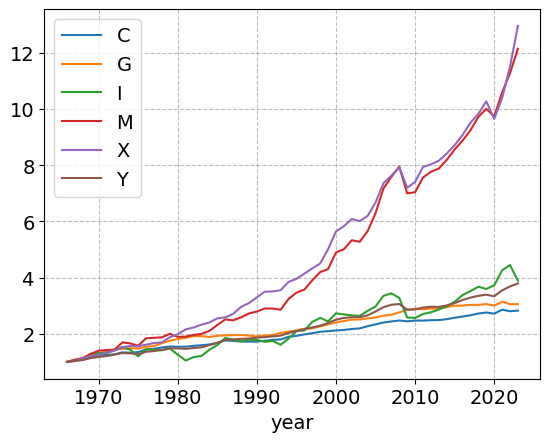

In [14]:
# a. split
nah1_true_grouped = nah1.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1.set_index(['variable','unit','year'],inplace=True)
nah1 = nah1.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1.reset_index(inplace=True)

# c. combine
nah1['indexed'] = nah1['value']/nah1['first']

# d. plot
def plot(df,variable='indexed'):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])[variable].plot(legend=True);
    
plot(nah1)

**Question** Implement the same split-apply-combine as above using `transform`.

In [15]:
def first(x): # select the first element in a series
    return x.iloc[0]

nah1_alt = nah1.copy()
grouped = nah1_alt.groupby(["year", "unit"])
nah1_alt["indexed"] = nah1_alt["value"].transform(lambda x: x/first(x))
nah1_alt.head()

,variable,unit,year,value,first,indexed
0,M,nominal,1966,24406.0,24406.0,1.000000
1,X,real,1966,123594.0,123594.0,5.064083
2,I,nominal,1966,21134.0,21134.0,0.865935
3,I,real,1966,127630.0,127630.0,5.229452
4,G,nominal,1966,14768.0,14768.0,0.605097


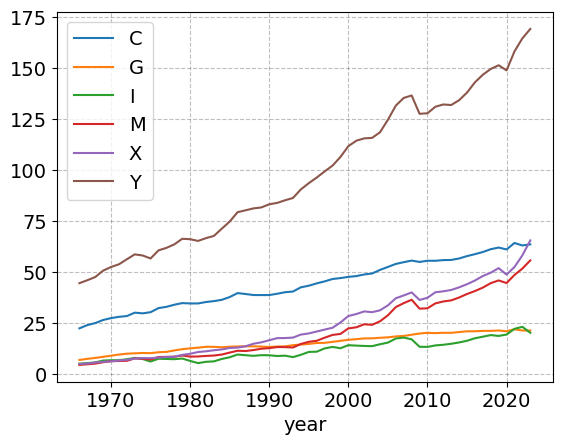

In [16]:
plot(nah1_alt)

**Answer:** See A4.py

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [17]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.PeriodIndex(prices_long.d,freq='Q').to_timestamp() # Convert to datetime
# prices_long['date'] = pd.to_datetime(prices_long.d) This works just as well but throws a warning


# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

,municipality,price,date
0,Hele landet,4021.0,1992-01-01
1,Region Hovedstaden,5836.0,1992-01-01
2,Landsdel København by,5658.0,1992-01-01
3,København,5355.0,1992-01-01
4,Frederiksberg,5183.0,1992-01-01


## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [23]:
# a. Initiate dstapi 
folk1a_api = DstApi('FOLK1A')

# b. Define which data to load
params = folk1a_api._define_base_params(language='en')
params['variables'][1]['values'] = ['TOT']
params['variables'][2]['values'] = ['IALT']
params['variables'][3]['values'] = ['TOT']

# c. Load data
pop = folk1a_api.get_data(params=params)


# d. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# e. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# f. convert to date
pop['date'] = pd.PeriodIndex(pop.TID,freq='Q').to_timestamp() # Convert to datetime
del pop['TID']

pop.head(25)

,municipality,population,date
0,Brøndby,35050,2015-01-01
1,Frederiksberg,103192,2015-01-01
2,Brøndby,34084,2012-01-01
3,Copenhagen,551580,2012-04-01
4,Ærø,6322,2014-07-01
5,Hvidovre,52047,2014-07-01
6,Vejen,42748,2014-07-01
7,Brøndby,33998,2010-10-01
8,Hvidovre,52380,2015-01-01
9,Fredensborg,39772,2015-01-01


## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

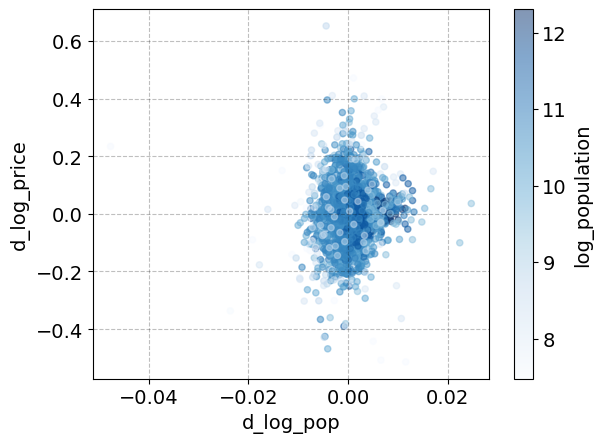

In [30]:
# write your code here 
merge = pd.merge(prices_long, pop, on = ["date", "municipality"], how="left")
merge.sort_values(["municipality", "date"], inplace= True)

# take log
merge["log_population"] = np.log(merge["population"])
merge["log_price"] = np.log(merge["price"])

merge[["d_log_pop", "d_log_price"]] = merge.groupby("municipality")[["log_population", "log_price"]].diff(1)

ax = merge.plot(x = "d_log_pop", y = "d_log_price", kind = "scatter",
                c = "log_population", cmap = "Blues", alpha =0.5)

**Answer:** See A5.py for difference in population within municipality. See A6.py for average difference within municipality

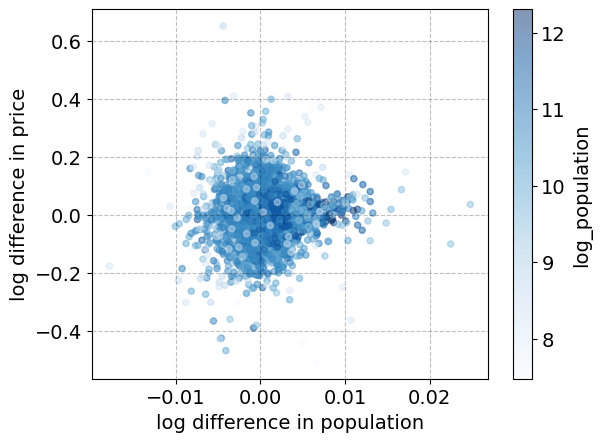

In [20]:
# Run is jupyer magic for running py files inside a notebook
%run -i A5.py

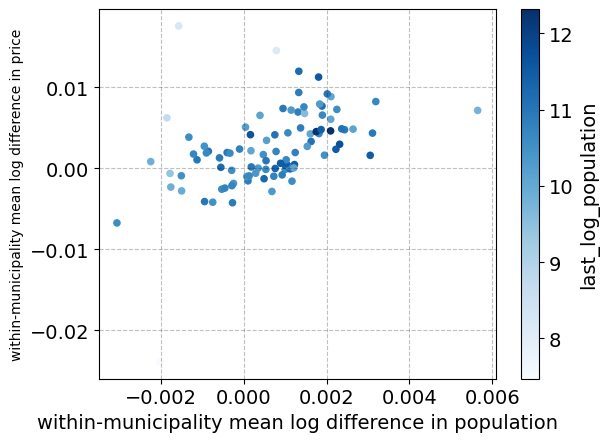

In [21]:
# Run is jupyer magic for running py files inside a notebook
%run -i A6.py